### Thanks to the previous 2 steps we were able to classify Github users by seniority based in followers and repos number. Now we will train a model which will be able to predict the seniority of Github users based in that parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv("../OUTPUT/df_train.csv").drop(columns={"Unnamed: 0"})
print(df_train.shape)
df_train.head()

(35778, 4)


,name,repos_number,followers,seniority
0,Tarun Sudhams,23,33,middle
1,Xiaowei Hu,43,125,principal
2,Daniel P. Palomar,9,95,principal
3,Kevin P,24,16,middle
4,Renfei HUANG,31,15,middle


### Descriptive Analysis

In [3]:
df_train.isnull().sum()

name            0
repos_number    0
followers       0
seniority       0
dtype: int64

In [4]:
seniority = df_train.seniority.value_counts()
seniority

junior       25292
middle        7946
senior        1311
principal      985
architect      244
Name: seniority, dtype: int64

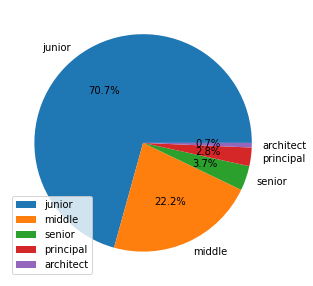

In [5]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(seniority, labels=seniority.keys(), autopct='%1.1f%%')
ax.legend(labels=seniority.keys(), loc=3)

Text(0.5, 1.0, 'Correlation matrix')

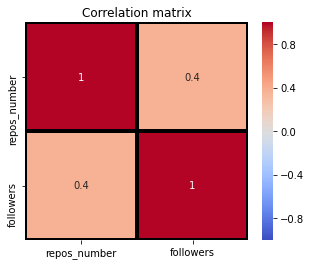

In [6]:
plt.figure(figsize=(5,4))

sns.heatmap(df_train.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

#### As a difference from the previous steps, in the sample we will use to predict the seniority of the users, there is some positive linear relation between the number of repos and the number of followers

### Encode & Split

In [7]:
labels_dict= {
    "junior":0,
    "middle":1,
    "senior":2,
    "principal":3,
    "architect":4
}

df_train["label"] = df_train.seniority.map(labels_dict)
df_train.head()

,name,repos_number,followers,seniority,label
0,Tarun Sudhams,23,33,middle,1
1,Xiaowei Hu,43,125,principal,3
2,Daniel P. Palomar,9,95,principal,3
3,Kevin P,24,16,middle,1
4,Renfei HUANG,31,15,middle,1


In [8]:
X = df_train[["repos_number", "followers"]]
y = df_train.label

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

y = np.ravel(y) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28622, 2) (7156, 2) (28622,) (7156,)


In [155]:
#1st select the splited X and y. Then after your model achieves the accuracy needed, train with 100% X and y
#However if you thing you could be overfitting your data you can use the splited model to test
# X, y ----- X_train, y_train
X_training = X
y_training = y

## Training Models

## Tree Models 

### Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier().fit(X_training, y_training)

dtree_pred = dtree_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [157]:
dtree_acc = accuracy_score(y_test, dtree_pred)
print("Accuracy", dtree_acc,"\n")
print("Precision", precision_score(y_test, dtree_pred, average=None),"\n")
print("Recall", recall_score(y_test, dtree_pred, average=None),"\n")
print("F1Score", f1_score(y_test, dtree_pred, average=None),"\n")

Accuracy 0.9990217998882057 

Precision [0.99900853 0.99877825 1.         1.         1.        ] 

Recall [0.99960317 0.99695122 1.         1.         1.        ] 

F1Score [0.99930576 0.9978639  1.         1.         1.        ] 



In [158]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



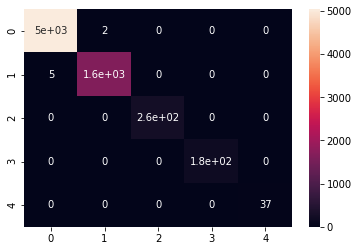

In [159]:
cm_dtree = confusion_matrix(y_test,dtree_pred)
sns.heatmap(cm_dtree, annot=True)

## Esemble Models

### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier().fit(X_training, y_training)

rf_pred = rf_model.predict(X_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [161]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy", rf_acc,"\n")
print("Precision", precision_score(y_test, rf_pred, average=None),"\n")
print("Recall", recall_score(y_test, rf_pred, average=None),"\n")
print("F1Score", f1_score(y_test, rf_pred, average=None),"\n")

Accuracy 0.9990217998882057 

Precision [0.99900853 0.99877825 1.         1.         1.        ] 

Recall [0.99960317 0.99695122 1.         1.         1.        ] 

F1Score [0.99930576 0.9978639  1.         1.         1.        ] 



In [162]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



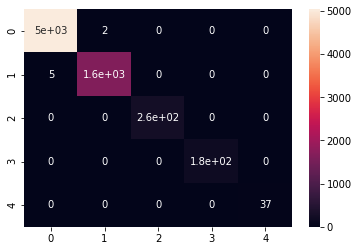

In [163]:
cm_rf = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm_rf,annot=True)

### Gradient Boosting

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier().fit(X_training, y_training)

gb_pred = gb_model.predict(X_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [165]:
gb_acc = accuracy_score(y_test, gb_pred)
print("Accuracy", gb_acc,"\n")
print("Precision", precision_score(y_test, gb_pred, average=None),"\n")
print("Recall", recall_score(y_test, gb_pred, average=None),"\n")
print("F1Score", f1_score(y_test, gb_pred, average=None),"\n")

Accuracy 0.9988820570150923 

Precision [0.99861276 0.999388   1.         1.         1.        ] 

Recall [0.99980159 0.99573171 1.         1.         1.        ] 

F1Score [0.99920682 0.99755651 1.         1.         1.        ] 



In [166]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



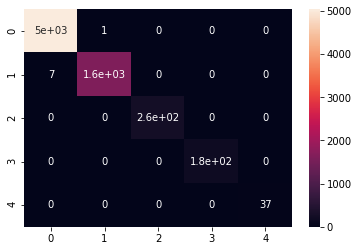

In [167]:
cm_gb = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm_gb,annot=True)

### Extra Trees Classifier

In [168]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier().fit(X_training, y_training)

et_pred = et_model.predict(X_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [169]:
et_acc = accuracy_score(y_test, et_pred)
print("Accuracy", et_acc,"\n")
print("Precision", precision_score(y_test, et_pred, average=None),"\n")
print("Recall", recall_score(y_test, et_pred, average=None),"\n")
print("F1Score", f1_score(y_test, et_pred, average=None),"\n")

Accuracy 0.9990217998882057 

Precision [0.99900853 0.99877825 1.         1.         1.        ] 

Recall [0.99960317 0.99695122 1.         1.         1.        ] 

F1Score [0.99930576 0.9978639  1.         1.         1.        ] 



In [170]:
print(classification_report(y_test,et_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



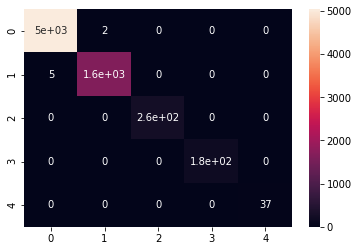

In [171]:
cm_et = confusion_matrix(y_test,et_pred)
sns.heatmap(cm_et,annot=True)

## Bayesian Models

### BernoulliNB

In [172]:
from sklearn.naive_bayes import BernoulliNB

ber_model = BernoulliNB().fit(X_training, y_training)

ber_pred = ber_model.predict(X_test)
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [173]:
ber_acc =  accuracy_score(y_test, ber_pred)
print("Accuracy", ber_acc,"\n")
print("Precision", precision_score(y_test, ber_pred, average=None),"\n")
print("Recall", recall_score(y_test, ber_pred, average=None),"\n")
print("F1Score", f1_score(y_test, ber_pred, average=None),"\n")

Accuracy 0.704304080491895 

Precision [0.70430408 0.         0.         0.         0.        ] 

Recall [1. 0. 0. 0. 0.] 

F1Score [0.82650049 0.         0.         0.         0.        ] 



/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
print(classification_report(y_test,ber_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83      5040
           1       0.00      0.00      0.00      1640
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00        37

    accuracy                           0.70      7156
   macro avg       0.14      0.20      0.17      7156
weighted avg       0.50      0.70      0.58      7156



/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


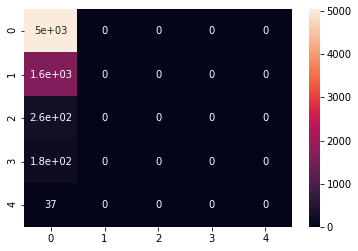

In [175]:
cm_ber = confusion_matrix(y_test,ber_pred)
sns.heatmap(cm_ber,annot=True)

In [176]:
from sklearn.naive_bayes import GaussianNB

gau_model = GaussianNB().fit(X_training, y_training)

gau_pred = gau_model.predict(X_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [177]:
gau_acc = accuracy_score(y_test, gau_pred)
print("Accuracy", gau_acc,"\n")
print("Precision", precision_score(y_test, gau_pred, average=None),"\n")
print("Recall", recall_score(y_test, gau_pred, average=None),"\n")
print("F1Score", f1_score(y_test, gau_pred, average=None),"\n")

Accuracy 0.9682783678032421 

Precision [0.99430547 0.90659026 0.98367347 0.86124402 0.925     ] 

Recall [0.97003968 0.96463415 0.94140625 0.98360656 1.        ] 

F1Score [0.9820227  0.93471196 0.96207585 0.91836735 0.96103896] 



In [178]:
print(classification_report(y_test,gau_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5040
           1       0.91      0.96      0.93      1640
           2       0.98      0.94      0.96       256
           3       0.86      0.98      0.92       183
           4       0.93      1.00      0.96        37

    accuracy                           0.97      7156
   macro avg       0.93      0.97      0.95      7156
weighted avg       0.97      0.97      0.97      7156



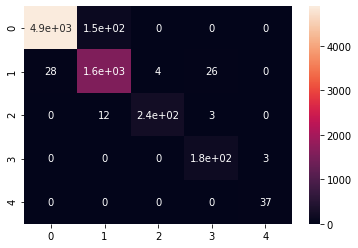

In [179]:
cm_gau = confusion_matrix(y_test,gau_pred)
sns.heatmap(cm_gau,annot=True)

## Neighbors Models

### KNeighbors Classifier

In [180]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier().fit(X_training, y_training)

kn_pred = kn_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [181]:
kn_acc = accuracy_score(y_test, kn_pred)
print("Accuracy", kn_acc,"\n")
print("Precision", precision_score(y_test, kn_pred, average=None),"\n")
print("Recall", recall_score(y_test, kn_pred, average=None),"\n")
print("F1Score", f1_score(y_test, kn_pred, average=None),"\n")

Accuracy 0.9988820570150923 

Precision [0.99920651 0.9981685  0.99610895 1.         1.        ] 

Recall [0.99940476 0.99695122 1.         1.         1.        ] 

F1Score [0.99930562 0.99755949 0.99805068 1.         1.        ] 



In [182]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



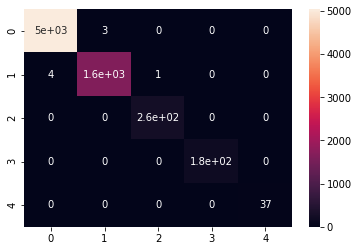

In [183]:
cm_kn = confusion_matrix(y_test,kn_pred)
sns.heatmap(cm_kn,annot=True)

### Nearest Centroid

In [184]:
from sklearn.neighbors import NearestCentroid

nc_model = NearestCentroid().fit(X_training, y_training)

nc_pred = nc_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [185]:
nc_acc = accuracy_score(y_test, nc_pred)
print("Accuracy", nc_acc,"\n")
print("Precision", precision_score(y_test, nc_pred, average=None),"\n")
print("Recall", recall_score(y_test, nc_pred, average=None),"\n")
print("F1Score", f1_score(y_test, nc_pred, average=None),"\n")

Accuracy 0.9920346562325322 

Precision [0.99405705 0.98350641 1.         1.         1.        ] 

Recall [0.99563492 0.98170732 0.99609375 0.97814208 1.        ] 

F1Score [0.99484536 0.98260604 0.99804305 0.98895028 1.        ] 



In [186]:
print(classification_report(y_test,nc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5040
           1       0.98      0.98      0.98      1640
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       183
           4       1.00      1.00      1.00        37

    accuracy                           0.99      7156
   macro avg       1.00      0.99      0.99      7156
weighted avg       0.99      0.99      0.99      7156



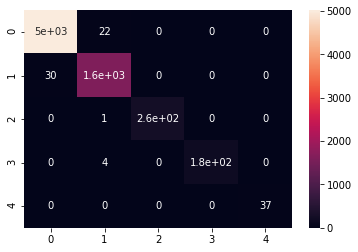

In [187]:
cm_nc = confusion_matrix(y_test,nc_pred)
sns.heatmap(cm_nc,annot=True)

### Radius Neighbors Classifier

In [188]:
from sklearn.neighbors import RadiusNeighborsClassifier

rn_model = RadiusNeighborsClassifier(radius=100).fit(X_training, y_training)

rn_pred = rn_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [189]:
rn_acc = accuracy_score(y_test, rn_pred)
print("Accuracy", rn_acc,"\n")
print("Precision", precision_score(y_test, rn_pred, average=None),"\n")
print("Recall", recall_score(y_test, rn_pred, average=None),"\n")
print("F1Score", f1_score(y_test, rn_pred, average=None),"\n")

Accuracy 0.7266629401900503 

Precision [0.73437272 0.         0.98       0.93023256 1.        ] 

Recall [1.         0.         0.19140625 0.43715847 0.83783784] 

F1Score [0.84684533 0.         0.32026144 0.59479554 0.91176471] 



In [190]:
print(classification_report(y_test,rn_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      5040
           1       0.00      0.00      0.00      1640
           2       0.98      0.19      0.32       256
           3       0.93      0.44      0.59       183
           4       1.00      0.84      0.91        37

    accuracy                           0.73      7156
   macro avg       0.73      0.49      0.53      7156
weighted avg       0.58      0.73      0.63      7156



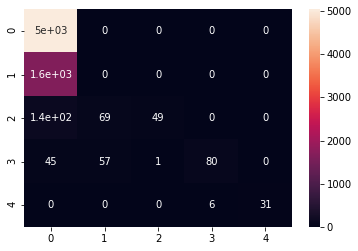

In [191]:
cm_rn = confusion_matrix(y_test,rn_pred)
sns.heatmap(cm_rn,annot=True)

## Vector Models

### Linear SVC

In [192]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(multi_class="crammer_singer", max_iter=100000).fit(X_training, y_training)

svc_pred = svc_model.predict(X_test)
%time

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 6.68 µs


/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [193]:
svc_acc = accuracy_score(y_test, svc_pred)
print("Accuracy", svc_acc,"\n")
print("Precision", precision_score(y_test, svc_pred, average=None),"\n")
print("Recall", recall_score(y_test, svc_pred, average=None),"\n")
print("F1Score", f1_score(y_test, svc_pred, average=None),"\n")

Accuracy 0.9935718278367803 

Precision [0.99900833 0.98139256 1.         0.94764398 1.        ] 

Recall [0.99940476 0.99695122 0.8984375  0.98907104 0.72972973] 

F1Score [0.99920651 0.98911071 0.94650206 0.96791444 0.84375   ] 



In [194]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       0.98      1.00      0.99      1640
           2       1.00      0.90      0.95       256
           3       0.95      0.99      0.97       183
           4       1.00      0.73      0.84        37

    accuracy                           0.99      7156
   macro avg       0.99      0.92      0.95      7156
weighted avg       0.99      0.99      0.99      7156



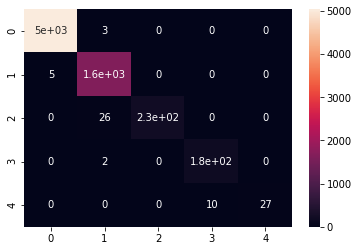

In [195]:
cm_svc = confusion_matrix(y_test,svc_pred)
sns.heatmap(cm_svc,annot=True)

## Linear Models

### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class="multinomial", max_iter=100000).fit(X_training, y_training)

lr_pred = lr_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [197]:
lr_acc = accuracy_score(y_test, lr_pred)
print("Accuracy", lr_acc,"\n")
print("Precision", precision_score(y_test, lr_pred, average=None),"\n")
print("Recall", recall_score(y_test, lr_pred, average=None),"\n")
print("F1Score", f1_score(y_test, lr_pred, average=None),"\n")

Accuracy 0.9988820570150923 

Precision [0.99900833 0.9981685  1.         1.         1.        ] 

Recall [0.99940476 0.99695122 1.         1.         1.        ] 

F1Score [0.99920651 0.99755949 1.         1.         1.        ] 



In [198]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5040
           1       1.00      1.00      1.00      1640
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00        37

    accuracy                           1.00      7156
   macro avg       1.00      1.00      1.00      7156
weighted avg       1.00      1.00      1.00      7156



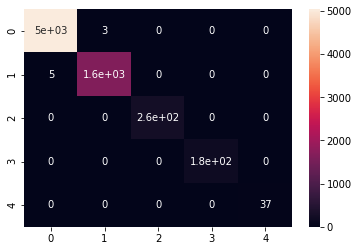

In [199]:
cm_lr = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm_lr,annot=True)

### Ridge Classifier

In [200]:
from sklearn.linear_model import RidgeClassifier

rc_model = RidgeClassifier().fit(X_training, y_training)

rc_pred = rc_model.predict(X_test)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [201]:
rc_acc = accuracy_score(y_test, rc_pred)
print("Accuracy", rc_acc,"\n")
print("Precision", precision_score(y_test, rc_pred, average=None),"\n")
print("Recall", recall_score(y_test, rc_pred, average=None),"\n")
print("F1Score", f1_score(y_test, rc_pred, average=None),"\n")

Accuracy 0.7646730016769144 

Precision [0.79320113 0.54098361 0.         0.51428571 0.        ] 

Recall [1.         0.24146341 0.         0.19672131 0.        ] 

F1Score [0.88467615 0.33389545 0.         0.28458498 0.        ] 



/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
print(classification_report(y_test,rc_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5040
           1       0.54      0.24      0.33      1640
           2       0.00      0.00      0.00       256
           3       0.51      0.20      0.28       183
           4       0.00      0.00      0.00        37

    accuracy                           0.76      7156
   macro avg       0.37      0.29      0.30      7156
weighted avg       0.70      0.76      0.71      7156



/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


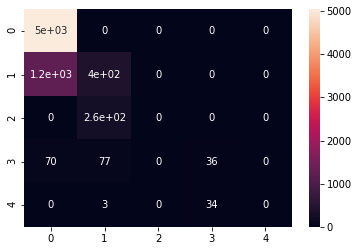

In [203]:
cm_rc = confusion_matrix(y_test,rc_pred)
sns.heatmap(cm_rc,annot=True)

In [154]:
algos_dict ={
    "Algorithms": ["DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", 
                  "ExtraTreesClassifier", "BernoulliNB", "GaussianNB", "KNeighborsClassifier", "NearestCentroid",
                  "RadiusNeighborsClassifier", "LinearSVC", "LogisticRegression", "RidgeClassifier"],
    "Accuracy": [dtree_acc, rf_acc, gb_acc, et_acc, ber_acc, gau_acc, kn_acc, 
                 nc_acc, rn_acc, svc_acc, lr_acc, rc_acc]
}

accuracy_80 = pd.DataFrame(algos_dict).sort_values(by=["Accuracy"], ascending=False)
accuracy_80

,Algorithms,Accuracy
10,LogisticRegression,0.998882
1,RandomForestClassifier,0.998463
0,DecisionTreeClassifier,0.998323
2,GradientBoostingClassifier,0.998183
3,ExtraTreesClassifier,0.998044
6,KNeighborsClassifier,0.997624
9,LinearSVC,0.992035
7,NearestCentroid,0.991895
5,GaussianNB,0.968278
11,RidgeClassifier,0.762856


In [204]:
algos_dict ={
    "Algorithms": ["DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", 
                  "ExtraTreesClassifier", "BernoulliNB", "GaussianNB", "KNeighborsClassifier", "NearestCentroid",
                  "RadiusNeighborsClassifier", "LinearSVC", "LogisticRegression", "RidgeClassifier"],
    "Accuracy": [dtree_acc, rf_acc, gb_acc, et_acc, ber_acc, gau_acc, kn_acc, 
                 nc_acc, rn_acc, svc_acc, lr_acc, rc_acc]
}
accuracy_100 = pd.DataFrame(algos_dict).sort_values(by=["Accuracy"], ascending=False)
accuracy_100

,Algorithms,Accuracy
0,DecisionTreeClassifier,0.999022
1,RandomForestClassifier,0.999022
3,ExtraTreesClassifier,0.999022
2,GradientBoostingClassifier,0.998882
6,KNeighborsClassifier,0.998882
10,LogisticRegression,0.998882
9,LinearSVC,0.993572
7,NearestCentroid,0.992035
5,GaussianNB,0.968278
11,RidgeClassifier,0.764673


#### As we can see the results are quiet similar, just the order between the 1st six algos have changed. So we we will use the 6 in the test

## Test Models

In [152]:
df_test = pd.read_csv("../OUTPUT/df_test.csv").drop(columns={"Unnamed: 0"})
print(df_test.shape)
df_test.head()

(8945, 4)


,name,repos_number,followers,seniority
0,Naoto Izumi,7,14,junior
1,Akito Mizuno,19,8,junior
2,CHIYOKAWA Hiroshi,5,10,junior
3,taiyo,19,11,junior
4,Rafał Rawicki,3,11,junior


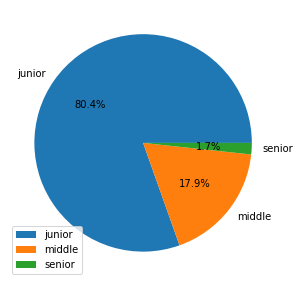

In [153]:
seniority_test = df_test.seniority.value_counts()

f, ax = plt.subplots(figsize=(15,5))
ax.pie(seniority_test, labels=seniority_test.keys(), autopct='%1.1f%%')
ax.legend(labels=seniority_test.keys(), loc=3)

In [205]:
df_test["label"] = df_test.seniority.map(labels_dict)
df_test.head()

,name,repos_number,followers,seniority,label
0,Naoto Izumi,7,14,junior,0
1,Akito Mizuno,19,8,junior,0
2,CHIYOKAWA Hiroshi,5,10,junior,0
3,taiyo,19,11,junior,0
4,Rafał Rawicki,3,11,junior,0


In [206]:
X_predict = df_test[["repos_number", "followers"]]
y_predict = df_test.label

### Decision Tree Classifier

In [207]:
dtree_pred_test = dtree_model.predict(X_predict)

dtree_acc = accuracy_score(y_predict, dtree_pred_test)
print("Accuracy", dtree_acc,"\n")

Accuracy 0.9987702627166014 



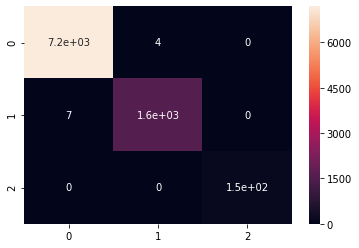

In [208]:
cm_dtree = confusion_matrix(y_predict, dtree_pred_test)
sns.heatmap(cm_dtree, annot=True)

### RandomForestClassifier

In [209]:
rf_pred_test = rf_model.predict(X_predict)

rf_acc = accuracy_score(y_predict, rf_pred_test)
print("Accuracy", rf_acc,"\n")

Accuracy 0.9987702627166014 



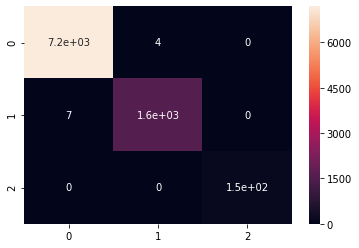

In [210]:
cm_rf = confusion_matrix(y_predict, rf_pred_test)
sns.heatmap(cm_rf, annot=True)

### ExtraTreesClassifier

In [211]:
et_pred_test = et_model.predict(X_predict)

et_acc = accuracy_score(y_predict, et_pred_test)
print("Accuracy", et_acc,"\n")

Accuracy 0.9987702627166014 



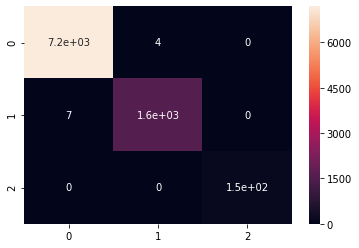

In [212]:
et_rf = confusion_matrix(y_predict, et_pred_test)
sns.heatmap(et_rf, annot=True)

### GradientBoostingClassifier

In [214]:
gb_pred_test = gb_model.predict(X_predict)

gb_acc = accuracy_score(y_predict, gb_pred_test)
print("Accuracy", gb_acc,"\n")

Accuracy 0.99854667411962 



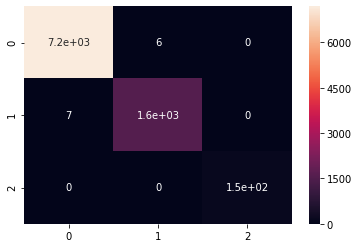

In [215]:
gb_rf = confusion_matrix(y_predict, gb_pred_test)
sns.heatmap(gb_rf, annot=True)

### KNeighborsClassifier

In [216]:
kn_pred_test = kn_model.predict(X_predict)

kn_acc = accuracy_score(y_predict, kn_pred_test)
print("Accuracy", kn_acc,"\n")

Accuracy 0.9983230855226384 



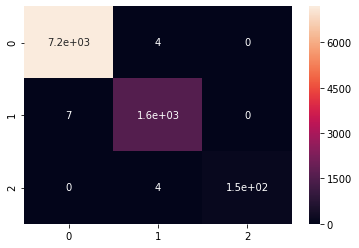

In [217]:
kn_rf = confusion_matrix(y_predict, kn_pred_test)
sns.heatmap(kn_rf, annot=True)

### LogisticRegression

In [218]:
lr_pred_test = lr_model.predict(X_predict)

lr_acc = accuracy_score(y_predict, lr_pred_test)
print("Accuracy", lr_acc,"\n")

Accuracy 0.9987702627166014 



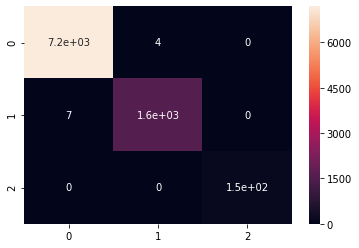

In [219]:
lr_rf = confusion_matrix(y_predict, lr_pred_test)
sns.heatmap(lr_rf, annot=True)

In [220]:
tested_algos ={
    "Algorithms": ["DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier", 
                  "ExtraTreesClassifier", "KNeighborsClassifier", "LogisticRegression"],
    "Accuracy": [dtree_acc, rf_acc, gb_acc, et_acc, kn_acc, lr_acc]
}
real_accuracy = pd.DataFrame(tested_algos).sort_values(by=["Accuracy"], ascending=False)
real_accuracy

,Algorithms,Accuracy
0,DecisionTreeClassifier,0.998770
1,RandomForestClassifier,0.998770
3,ExtraTreesClassifier,0.998770
5,LogisticRegression,0.998770
2,GradientBoostingClassifier,0.998547
4,KNeighborsClassifier,0.998323


### As we can see the 1st four algorithms have performed equal with the new data, however we will select Random Forest, as it is the best one as avg between the 3 accuracies

In [225]:
final_df = pd.concat([df_train,df_test])
final_df = final_df.drop(columns={"name"})
print(final_df.shape)
final_df.head()

(44723, 4)


,repos_number,followers,seniority,label
0,23,33,middle,1
1,43,125,principal,3
2,9,95,principal,3
3,24,16,middle,1
4,31,15,middle,1


### Final dataframe to train the Extra Trees Classifier

In [226]:
final_df.to_csv("../OUTPUT/final_df.csv", index=False)